# Machine Learning: Práctica 1
Profesor: Dr. Marco Aceves Fernández <br>
Alumno: Ing. Enrique Mena Camilo

## Descripción
Utilizando la base de datos de su elección, obtener las siguientes métricas de estadística descriptiva:

- Máximo
- Mínimo
- Desviación estándar
- Media
- Mediana
- Moda
- Valores atípicos
- Datos faltantes
- Tipo de distribución

Adicionalmente se deberán incluir 10 ejemplos de los tipos de gráficos disponibles en los paquetes [Pygal](https://www.pygal.org/en/stable/index.html) y [Bokeh](https://bokeh.org/).

# Instalación de paquetes necesarios

In [1]:
# Descomentar en primer ejecución
# !pip install -r requirements.txt


In [2]:
import pygal
import zipfile

import numpy as np
import pandas as pd
import statistics as st

from pprint import pprint
from bokeh.io import export_png
from bokeh.plotting import figure
from IPython.display import SVG, Image

pd.set_option("display.max_columns", None)


# Obtención de base de datos

Se descarga la base de datos desde el portal de la Secretaría de Salud del gobierno de México

In [3]:
# Descomentar en primer ejecución
# !wget --no-check-certificate \
#     https://datosabiertos.salud.gob.mx/gobmx/salud/datos_abiertos/datos_abiertos_covid19.zip \
#     -O ../data/datos_abiertos_covid19.zip


Se procede a extraer la información comprimida en archivo zip

In [4]:
# Descomentar en primer ejecución
# zip_path = "../data/datos_abiertos_covid19.zip"
# zip_ref = zipfile.ZipFile(zip_path, "r")
# zip_ref.extractall("../data/")
# zip_ref.close()


# Contexto de la base de datos

Se trata de un conjunto de datos de información clínica de pacientes COVID-19, el cuál fue obtenido del portal de datos abiertos de la Secretaría de Salud del gobierno de México.

La base de datos se almacena mediante un archivo CSV, el cual, según la información disponible en el portal, cuenta con un total de 6,716,793 instancias y 40 atributos.


## Descripción de los atributos

Para los datos faltantes se sigue la siguiente convención:
- 97: No aplica
- 98: Se ignora
- 99: No especificado
- 9999-99-99: No aplica

###

- FECHA_ACTUALIZACION:
    - Descripción: Fecha de la última actualización de la base de datos.
    - Formato: AAAA-MM-DD.
- ID_REGISTRO:
    - Descripción: Número identificador del caso.
    - Formato: Texto.
- ORIGEN:
    - Descripción: Permite identificar si el paciente fue canalizado desde alguna unidad de salid monitora de enfermedades respiratorias (USMER).
    - Formato: Entero.
    - Valores:
        - 1: USMER.
        - 2: Fuera de USMER.
        - 99: No especificado.
- SECTOR:
    - Descripción: Identifica el tipo de institución del Sistema Nacional de Salud que brindó la atención.
    - Formato: Entero.
    - Valores:
        - 1: Cruz Roja Mexicana.
        - 2: DIF.
        - 3: Estatal.
        - 4: IMSS.
        - 5: IMSS-Bienestar.
        - 6: ISSSTE.
        - 7: Municipal.
        - 8: PEMEX.
        - 9: Privada.
        - 10: SEDENA.
        - 11: SEMAR.
        - 12: SSA.
        - 13: Universitario.
        - 99: No especificado.
- ENTIDAD_UM:
    - Descripción: Identifica la entidad donde se ubica la unidad medica que brindó la atención.
    - Formato: Entero.
    - Valores: Consultar [catalogo_entidades.json](../data/catalogo_entidades.json).
- SEXO:
    - Descripción: Identifica el sexo del paciente.
    - Formato: Entero.
    - Valores:
        - 1: Mujer.
        - 2: Hombre.
        - 99 No especificado.
- ENTIDAD_NAC:
    - Descripción: Identifica la entidad de nacimiento del paciente.
    - Formato: Entero.
    - Valores: Consultar [catalogo_entidades.json](../data/catalogo_entidades.json).
- ENTIDAD_RES:
    - Descripción: Identifica la entidad de residencia del paciente.
    - Formato: Entero.
    - Valores: Consultar [catalogo_entidades.json](../data/catalogo_entidades.json).
- MUNICIPIO_RES:
    - Descripción: Identifica el municipio de residencia del paciente.
    - Formato: Entero.
- TIPO_PACIENTE:
    - Descripción: Identifica el tipo de atención que recibió el paciente en la unidad.
    - Formato: Entero.
    - Valores:
        - 1: Ambulatorio.
        - 2: Hospitalizado.
        - 99: No especificado.
- FECHA_INGRESO:
    - Descripción: Identifica la fecha de ingreso del paciente a la unidad de atención.
    - Formato: AAAA-MM-DD.
- FECHA_SINTOMAS:
    - Descripción: Identifica la fecha en que inició la sintomatología del paciente.
    - Formato: AAAA-MM-DD.
- FECHA_DEF:
    - Descripción: Identifica la fecha en que el paciente falleció.
    - Formato: AAAA-MM-DD.
    - Valores:
        - 9999-99-99: No aplica.
- INTUBADO:
    - Descripción: Identifica si el paciente requirió intubación.
    - Formato: Entero.
    - Valores:
        - 1: Sí.
        - 2: No.
        - 97: No aplica.
        - 98: Se ignora.
        - 99: No especificado.
- NEUMONIA:
    - Descripción: Identifica si sl paciente se le diagnosticó neumonía.
    - Formato: Entero.
    - Valores:
        - 1: Sí.
        - 2: No.
        - 97: No aplica.
        - 98: Se ignora.
        - 99: No especificado.
- EDAD:
    - Descripción: Identifica la edad del paciente.
    - Formato: Entero.
- NACIONALIDAD:
    - Descripción: Identifica si el paciente es mexicano o extranjero.
    - Formato: Entero.
    - Valores:
        - 1: Mexicana.
        - 2: Extranjera.
        - 3: No especificado.
- EMBARAZO:
    - Descripción: Identifica si la paciente está embarazada.
    - Formato: Entero.
    - Valores:
        - 1: Sí.
        - 2: No.
        - 97: No aplica.
        - 98: Se ignora.
        - 99: No especificado.
- HABLA_LENGUA_INDIG:
    - Descripción: Identifica si el paciente habla lengua indígena.
    - Formato: Entero.
    - Valores:
        - 1: Sí.
        - 2: No.
        - 97: No aplica.
        - 98: Se ignora.
        - 99: No especificado.
- INDIGENA:
    - Descripción: Identifica si el paciente se autoidentifica como una persona indígena.
    - Formato: Entero.
    - Valores:
        - 1: Sí.
        - 2: No.
        - 97: No aplica.
        - 98: Se ignora.
        - 99: No especificado.
- DIABETES:
    - Descripción: Identifica si el paciente tiene un diagnóstico de diabétes.
    - Formato: Entero.
    - Valores:
        - 1: Sí.
        - 2: No.
        - 97: No aplica.
        - 98: Se ignora.
        - 99: No especificado.
- EPOC:
    - Descripción: Identifica si el paciente tiene un diagnóstico de EPOC.
    - Formato: Entero.
    - Valores:
        - 1: Sí.
        - 2: No.
        - 97: No aplica.
        - 98: Se ignora.
        - 99: No especificado.
- ASMA:
    - Descripción: Identifica si el paciente tiene un diagnóstico de asma.
    - Formato: Entero.
    - Valores:
        - 1: Sí.
        - 2: No.
        - 97: No aplica.
        - 98: Se ignora.
        - 99: No especificado.
- INMUSUPR:
    - Descripción: Identifica si el paciente presenta inmunosupresión.
    - Formato: Entero.
    - Valores:
        - 1: Sí.
        - 2: No.
        - 97: No aplica.
        - 98: Se ignora.
        - 99: No especificado.
- EPOC:
    - Descripción: Identifica si el paciente tiene un diagnóstico de EPOC.
    - Formato: Entero.
    - Valores:
        - 1: Sí.
        - 2: No.
        - 97: No aplica.
        - 98: Se ignora.
        - 99: No especificado.
- OTRAS_COM:
    - Descripción: Identifica si el paciente tiene un diagnóstico de otras enfermedades.
    - Formato: Entero.
    - Valores:
        - 1: Sí.
        - 2: No.
        - 97: No aplica.
        - 98: Se ignora.
        - 99: No especificado.
- CARDIOVASCULAR:
    - Descripción: Identifica si el paciente tiene un diagnóstico de enfermedades cardiovasculares.
    - Formato: Entero.
    - Valores:
        - 1: Sí.
        - 2: No.
        - 97: No aplica.
        - 98: Se ignora.
        - 99: No especificado.
- OBESIDAD:
    - Descripción: Identifica si el paciente tiene un diagnóstico de obesidad.
    - Formato: Entero.
    - Valores:
        - 1: Sí.
        - 2: No.
        - 97: No aplica.
        - 98: Se ignora.
        - 99: No especificado.
- RENAL_CRONICA:
    - Descripción: Identifica si el paciente tiene un diagnóstico de insuficiencia renal crónica.
    - Formato: Entero.
    - Valores:
        - 1: Sí.
        - 2: No.
        - 97: No aplica.
        - 98: Se ignora.
        - 99: No especificado.
- TABAQUISMO:
    - Descripción: Identifica si el paciente tiene hábito de tabaquismo.
    - Formato: Entero.
    - Valores:
        - 1: Sí.
        - 2: No.
        - 97: No aplica.
        - 98: Se ignora.
        - 99: No especificado.
- OTRO_CASO:
    - Descripción: Identifica si el paciente tuvo contacto con algún otro caso diagnosticado de SARS CoV-2.
    - Formato: Entero.
    - Valores:
        - 1: Sí.
        - 2: No.
        - 97: No aplica.
        - 98: Se ignora.
        - 99: No especificado.
- TOMA_MUESTRA_LAB:
    - Descripción: Identifica si al paciente se le tomó muestra de laboratorio.
    - Formato: Entero.
    - Valores:
        - 1: Sí.
        - 2: No.
        - 97: No aplica.
        - 98: Se ignora.
        - 99: No especificado.
- RESULTADO_LAB:
    - Descripción: Identifica el resultado del análisis de la muestra reportado por el  laboratorio.
    - Formato: Entero.
    - Valores:
        - 1: Positivo a SARS CoV-2.
        - 2: Negativo a SARS CoV-2.
        - 3: Resultado pendiente.
        - 4: Resultado no adecuado.
        - 97: No aplica (caso sin muestra).
- TOMA_MUESTRA_ANTIGENO:
    - Descripción: Identifica si al paciente se le tomó muestra de antígeno para SARS-CoV-2.
    - Formato: Entero.
    - Valores:
        - 1: Sí.
        - 2: No.
        - 97: No aplica.
        - 98: Se ignora.
        - 99: No especificado.
- RESULTADO_ANTIGENO:
    - Descripción: Identifica el resultado del análisis de la muestra de antígeno tomada al paciente.
    - Formato: Entero.
    - Valores:
        - 1: Positivo a SARS CoV-2.
        - 2: Negativo a SARS CoV-2.
        - 97: No aplica (caso sin muestra).
- CLASIFICACION_FINAL:
    - Descripción: Identifica si el paciente es un caso de COVID-19 según [catalogo_clasificacion_final.json](../data/catalogo_clasificacion_final.json).
    - Formato:  Entero.
    - Valores: Consultar [catalogo_clasificacion_final.json](../data/catalogo_clasificacion_final.json).
- MIGRANTE:
    - Descripción: Identifica si el paciente es una persona migrante.
    - Formato: Entero.
    - Valores:
        - 1: Sí.
        - 2: No.
        - 97: No aplica.
        - 98: Se ignora.
        - 99: No especificado.
- PAIS_NACIONALIDAD:
    - Descripción: Identifica la nacionalidad del paciente.
    - Formato: Texto.
- PAIS_ORIGEN:
    - Descripción: Identifica el país el que partió el paciente rumbo a México.
    - Formato: Texto.
- UCI:
    - Descripción: Identifica si el paciente requirió ingresar a Unidad de Cuidados Intensivos.
    - Formato: Entero.
    - Valores:
        - 1: Sí.
        - 2: No.
        - 97: No aplica.
        - 98: Se ignora.
        - 99: No especificado.





# Pre-procesamiento de datos

Se realiza la carga de los datos a memoria

In [5]:
# Debido a la gran cantidad de instancias que contiene la base de datos, solamente se realizará la carga de 10,000 
data = pd.read_csv("../data/230207COVID19MEXICO.csv", nrows=10000)


Se obtiene una muestra de los datos

In [6]:
data.head()


,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,EDAD,NACIONALIDAD,EMBARAZO,HABLA_LENGUA_INDIG,INDIGENA,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2023-02-07,065d18,2,12,5,1,5,5,30,1,2022-09-05,2022-09-04,9999-99-99,97,2,56,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,97,1,2,7,99,México,97,97
1,2023-02-07,135f85,2,12,5,1,5,5,30,1,2022-01-20,2022-01-19,9999-99-99,97,2,50,1,2,2,2,2,2,2,2,2,2,2,2,2,1,1,2,97,1,2,7,99,México,97,97
2,2023-02-07,07977b,2,12,14,2,14,14,9,2,2022-01-06,2022-01-02,9999-99-99,2,2,30,1,97,2,2,2,2,2,2,2,2,2,2,2,2,1,2,97,1,1,3,99,México,97,2
3,2023-02-07,1d4496,2,12,5,2,5,5,35,1,2022-12-19,2022-12-18,9999-99-99,97,2,63,1,97,2,2,1,2,2,2,1,2,2,2,2,2,2,1,1,2,97,3,99,México,97,97
4,2023-02-07,1b2d20,2,12,5,2,5,5,30,1,2022-01-20,2022-01-17,9999-99-99,97,2,36,1,97,2,2,1,2,2,2,1,2,2,2,2,2,1,2,97,1,2,7,99,México,97,97


Se eliminan atributos innecesarios

In [7]:
data = data.drop(columns=["FECHA_ACTUALIZACION", "ID_REGISTRO"])


El atributo *PAIS_ORIGEN* presenta la observación *97*, la cual, gracias a la descripción de la base de datos proporcionada, se entiende que su valor, en términos de país, sería *México*, ya que implica que el paciente no arribó a México desde el extranjero.

Por lo anteriormente mencionado, se procede a cambiar la observación *97* del atributo *PAIS_ORIGEN* por la observación *México*

In [8]:
data["PAIS_ORIGEN"] = data["PAIS_ORIGEN"].replace({"97": "México"})


Las observaciones _9999-99-99_ se reemplaza con _2222-12-31_ para coincidir con un formato de fecha válido

In [9]:
data = data.replace({"9999-99-99": "2222-12-31"})


Los atributos relacionados a fecha se actualizan a un tipo de dato de fecha

In [10]:
data["FECHA_INGRESO"] = pd.to_datetime(data["FECHA_INGRESO"], format="%Y-%m-%d")
data["FECHA_SINTOMAS"] = pd.to_datetime(data["FECHA_SINTOMAS"], format="%Y-%m-%d")
data["FECHA_DEF"] = pd.to_datetime(data["FECHA_DEF"], format="%Y-%m-%d")


Exluyendo los atributos relacionados a fecha y los atributos de texto (PAIS_NACIONALIDAD y PAIS_ORIGEN), la base de datos contien solamente atributos categóricos, por lo que se procede a formatearlos de forma adecuada

In [11]:
atributos_categoricos = []
for atributo in data.columns.to_list():
    if atributo not in ["FECHA_INGRESO", "FECHA_SINTOMAS", "FECHA_DEF", "PAIS_NACIONALIDAD", "PAIS_ORIGEN"]:
        atributos_categoricos.append(atributo)
        
data[atributos_categoricos] = data[atributos_categoricos].astype(int)


# Análisis de datos

Se declara una clase que permitirá obtener estadística descriptiva del atributo solicitado

In [12]:
class EstadisticaDescriptiva:
    """Permite obtener la estadística descriptiva de la base de datos.
    """
    def __init__(self, dataset: pd.DataFrame) -> None:
        """Inicializador de la clase EstadisticaDescriptiva.

        :param pd.DataFrame dataset: Base de datos a analizar.
        """
        self.dataset = dataset
        
    def describir_atributo(self, atributo: str) -> dict:
        """Permite obtener parámetros como mínimo, máximo, moda, mediana, promedio,
        desviación estándar, tipo de dato y cantidad de datos faltantes del atributo
        especificado.

        :param str atributo: Atributo que se desea analizar.
        :return dict: Parámetros obtenidos del atributo analizado.
        """
        sub_data = self.dataset[atributo].to_numpy()
        
        descriptivos = dict()
        descriptivos["atributo"] = atributo
        descriptivos["dtype"] = type(sub_data[0])
        descriptivos["minimo"] = np.min(sub_data)
        descriptivos["maximo"] = np.max(sub_data)
        descriptivos["moda"] = st.mode(sub_data)
        # Para el caso especial de esta base de datos, los datos faltantes están codificados con '98' y '99'
        descriptivos["faltantes"] = np.count_nonzero(sub_data == 98) + np.count_nonzero(sub_data == 99)
        if str(self.dataset[atributo].dtype) not in ["object", "datetime64[ns]"]:
            descriptivos["mediana"] = st.median(sub_data)
            descriptivos["desviacion_estandar"] = st.stdev(sub_data)
            descriptivos["promedio"] = st.mean(sub_data)
            
        return descriptivos
    
    def obtener_balance(self, atributo: str) -> dict:
        """Permite determinar la cantidad de instancias para cada observación del
        atributo especificado.
        
        :param str atributo: Atributo que se desea analizar.
        :return dict: Cantidad de instancias por observación.
        """
        return self.dataset[atributo].value_counts().to_dict()
        
    
descriptiva = EstadisticaDescriptiva(data)


Se realiza la obtención de estadistica descriptiva para cada atributo

In [13]:
atributos = data.columns.to_list()

descriptivos = []
for atributo in atributos:
    descriptivos.append(descriptiva.describir_atributo(atributo))
    
descriptivos = pd.DataFrame(descriptivos)
descriptivos


D:\.enviroments\win10\ML-P1\lib\statistics.py:714: RuntimeWarning: overflow encountered in scalar add
  partials[diff_d * diff_d] += diff_n * diff_n
D:\.enviroments\win10\ML-P1\lib\statistics.py:714: RuntimeWarning: overflow encountered in scalar multiply
  partials[diff_d * diff_d] += diff_n * diff_n
C:\Users\pcdesk\AppData\Local\Temp\ipykernel_24792\1036714790.py:28: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  descriptivos["faltantes"] = np.count_nonzero(sub_data == 98) + np.count_nonzero(sub_data == 99)


,atributo,dtype,minimo,maximo,moda,faltantes,mediana,desviacion_estandar,promedio
0,ORIGEN,<class 'numpy.int32'>,1,2,2,0,2.0,0.0,1.0
1,SECTOR,<class 'numpy.int32'>,1,13,12,0,12.0,0.0,9.0
2,ENTIDAD_UM,<class 'numpy.int32'>,1,32,9,0,9.0,0.0,13.0
3,SEXO,<class 'numpy.int32'>,1,2,1,0,1.0,0.0,1.0
4,ENTIDAD_NAC,<class 'numpy.int32'>,1,99,9,81,9.0,0.0,14.0
5,ENTIDAD_RES,<class 'numpy.int32'>,1,32,9,0,9.0,0.0,13.0
6,MUNICIPIO_RES,<class 'numpy.int32'>,1,530,5,23,13.0,0.0,25.0
7,TIPO_PACIENTE,<class 'numpy.int32'>,1,2,1,0,1.0,0.0,1.0
8,FECHA_INGRESO,<class 'numpy.datetime64'>,2022-01-01T00:00:00.000000000,2023-02-03T00:00:00.000000000,2022-01-03T00:00:00.000000000,0,NaN,NaN,NaN
9,FECHA_SINTOMAS,<class 'numpy.datetime64'>,2022-01-01T00:00:00.000000000,2023-02-03T00:00:00.000000000,2022-01-01T00:00:00.000000000,0,NaN,NaN,NaN


La base de datos utilizada no contiene definido un atributo objetivo, sin embargo, para fines demostrativos, utilizaremos al atributo *CLASIFICACION_FINAL* para obtener el balance de clases.

In [14]:
balance_clases = descriptiva.obtener_balance("CLASIFICACION_FINAL")
pprint(balance_clases, width=10)


{1: 118,
 2: 1,
 3: 3887,
 5: 34,
 6: 179,
 7: 5781}


## Visualización de datos

### Linea

In [15]:
xy = data["FECHA_DEF"].value_counts().sort_index()
xy = np.array(list(xy.items()))[:20]


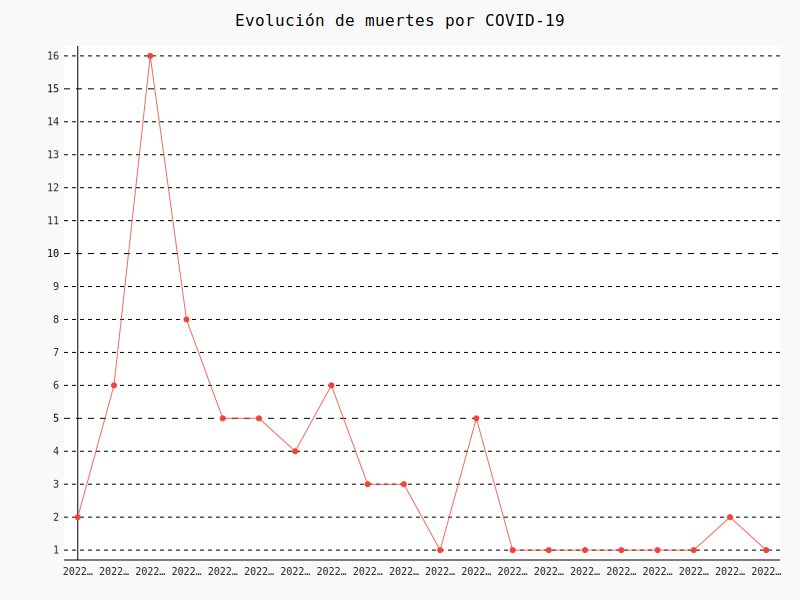

In [16]:
# Usando Pygal
line_chart = pygal.Line()
line_chart.title = 'Evolución de muertes por COVID-19'
line_chart.x_labels = map(str, xy[:, 0])
line_chart.add(None, xy[:, 1])
line_chart.render_to_file("./figures/pygal_linea.svg")
SVG(filename="./figures/pygal_linea.svg")


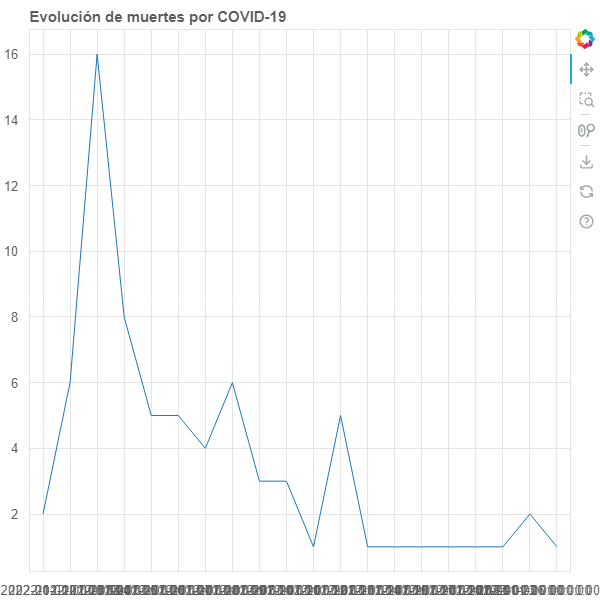

In [17]:
# Usando Bokeh
p = figure(x_range=list(map(str, xy[:, 0])), title="Evolución de muertes por COVID-19")
p.line(x=list(map(str, xy[:, 0])), y=xy[:, 1])
export_png(p, filename="./figures/bokeh_linea.png")
Image(filename="./figures/bokeh_linea.png")


### Gráfico de barras

In [18]:
xy = np.array(list(balance_clases.items()))


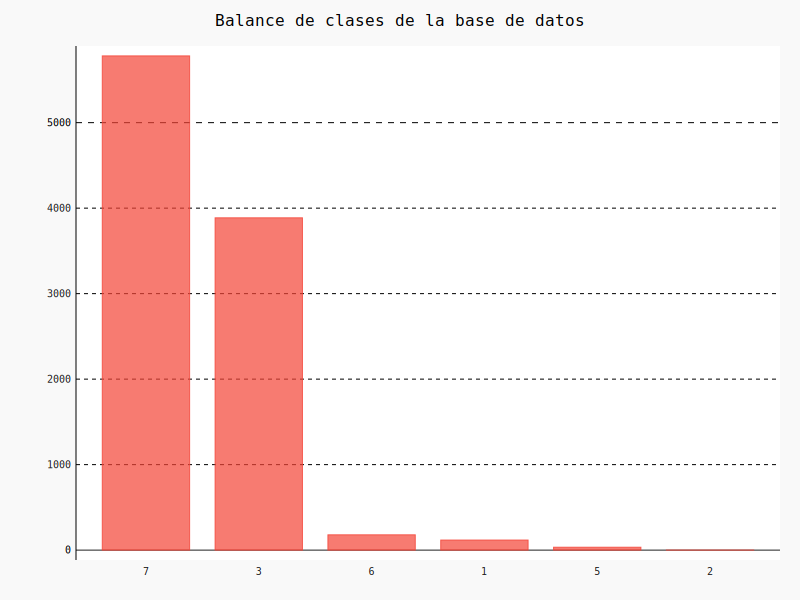

In [19]:
# Usando Pygal
bar_chart = pygal.Bar()
bar_chart.title = "Balance de clases de la base de datos"
bar_chart.x_labels = map(str, xy[:, 0])
bar_chart.add(None, xy[:, 1])
bar_chart.render_to_file("./figures/pygal_barras.svg")
SVG(filename="./figures/pygal_barras.svg")


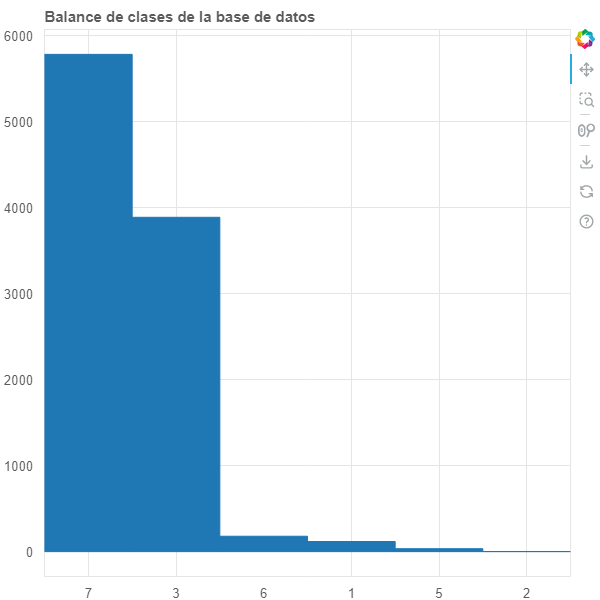

In [20]:
# Usando Bokeh
p = figure(x_range=list(map(str, xy[:, 0])), title="Balance de clases de la base de datos")
p.vbar(x=list(map(str, xy[:, 0])), top=xy[:, 1])
export_png(p, filename="./figures/bokeh_barras.png")
Image(filename="./figures/bokeh_barras.png")


### Histograma

In [21]:
hist, edges = np.histogram(data["ENTIDAD_NAC"], bins=40)
hist = np.expand_dims(hist, axis=1)
edges = np.expand_dims(edges, axis=1)
hist_array = np.concatenate((hist, edges[:-1], edges[1:]), axis=1)


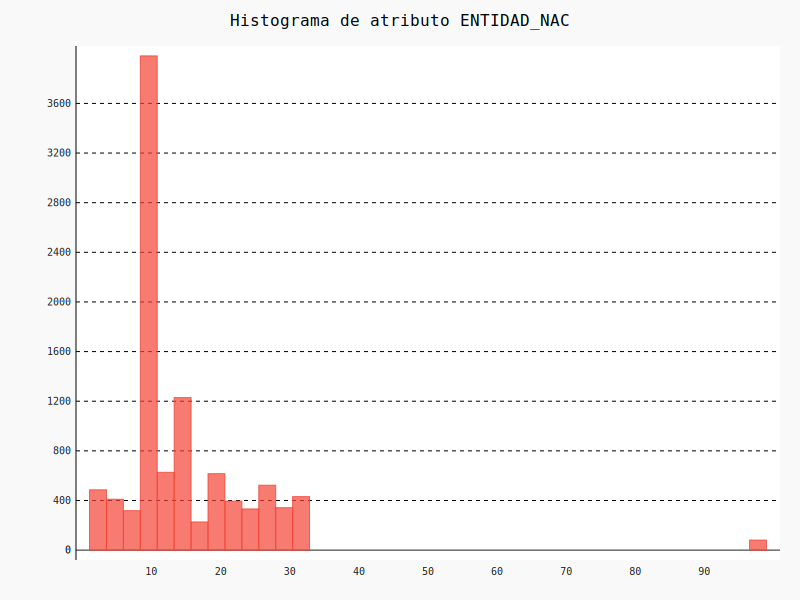

In [22]:
# Usando Pygal
hist_ = pygal.Histogram()
hist_.add(None, hist_array)
hist_.title = "Histograma de atributo ENTIDAD_NAC"
hist_.render_to_file("./figures/pygal_histograma.svg")
SVG(filename="./figures/pygal_histograma.svg")


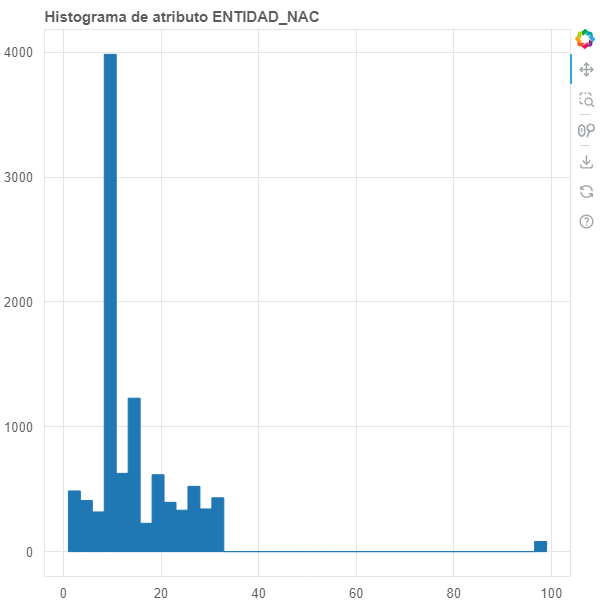

In [23]:
# Usando Bokeh
p = figure(title="Histograma de atributo ENTIDAD_NAC")
p.quad(top=hist[:, 0], bottom=0, left=edges[:-1, 0], right=edges[1:, 0])
export_png(p, filename="./figures/bokeh_histograma.png")
Image(filename="./figures/bokeh_histograma.png")


### Gráfico de dispersión

In [24]:
x = data["ENTIDAD_NAC"].to_numpy()
y = data["ENTIDAD_UM"].to_numpy()
x = np.expand_dims(x, axis=1)
y = np.expand_dims(y, axis=1)
xy = np.concatenate((x, y), axis=1)


In [25]:
# Usando Pygal
scatter_chart = pygal.XY(stroke=False)
scatter_chart.title = "ENTIDAD_NAC vd ENTIDAD_UM"
scatter_chart.add(None, xy)
scatter_chart.render_to_file("./figures/pygal_dispersion.svg")
SVG(filename="./figures/pygal_dispersion.svg")


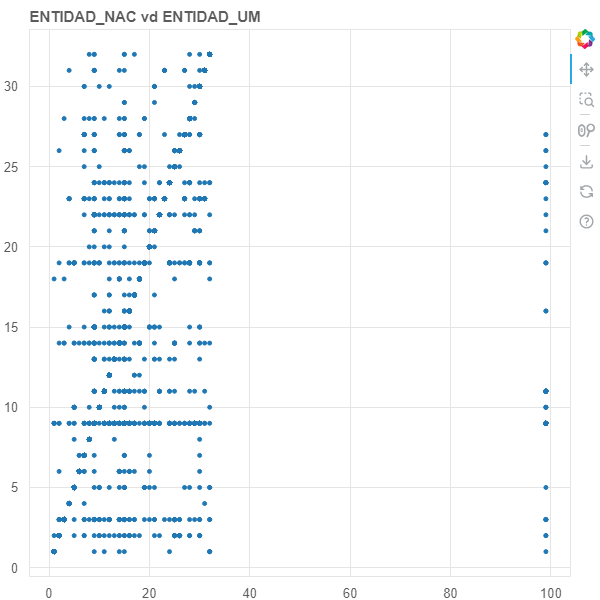

In [26]:
# Usando Bokeh
p = figure(title="ENTIDAD_NAC vd ENTIDAD_UM")
p.circle("ENTIDAD_NAC", "ENTIDAD_UM", source=data)
export_png(p, filename="./figures/bokeh_dispersion.png")
Image(filename="./figures/bokeh_dispersion.png")


### Gráfico de pastel

In [27]:
sectores = descriptiva.obtener_balance("SECTOR")


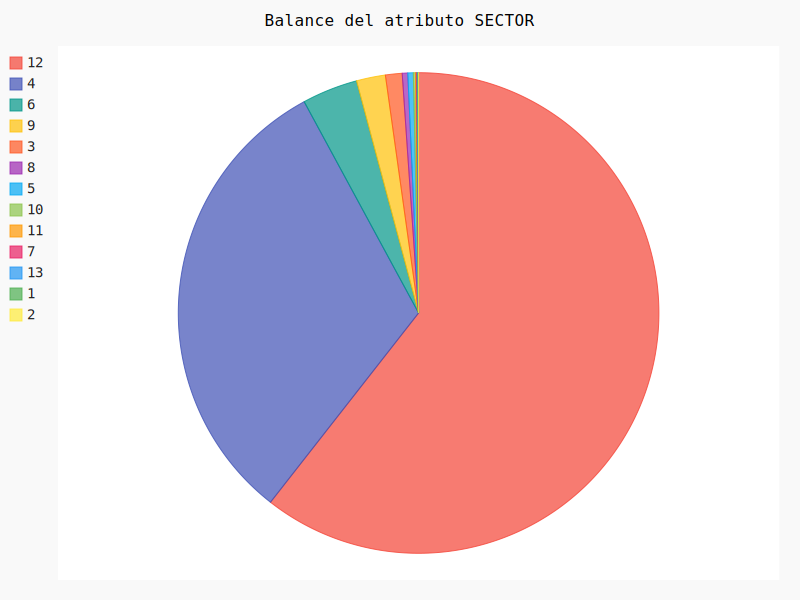

In [28]:
# Usando Pygal
pie_chart = pygal.Pie()
pie_chart.title = "Balance del atributo SECTOR"
for sector in sectores:
    pie_chart.add(str(sector), sectores[sector])
pie_chart.render_to_file("./figures/pygal_pastel.svg")
SVG(filename="./figures/pygal_pastel.svg")


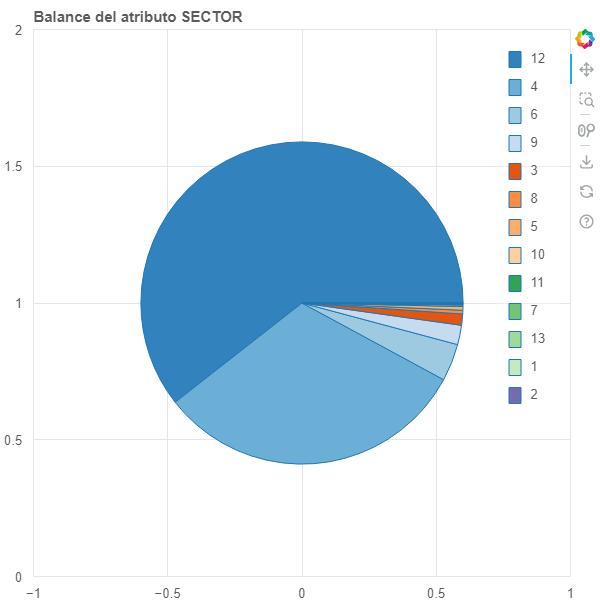

In [29]:
# Usando Bokeh
from bokeh.palettes import Category20c
from bokeh.transform import cumsum

sector_ = pd.Series(sectores).reset_index(name='value').rename(columns={'index': 'sector'})
sector_['angle'] = sector_['value']/sector_['value'].sum() * 2*np.pi
sector_['color'] = Category20c[len(sectores)]

p = figure(title="Balance del atributo SECTOR")
p.wedge(x=0, y=1, radius=0.6,
        start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        fill_color="color", legend_field="sector", source=sector_)
export_png(p, filename="./figures/bokeh_pastel.png")
Image(filename="./figures/bokeh_pastel.png")


### Diagrama de cajas

In [30]:
edad = data["EDAD"].to_numpy()


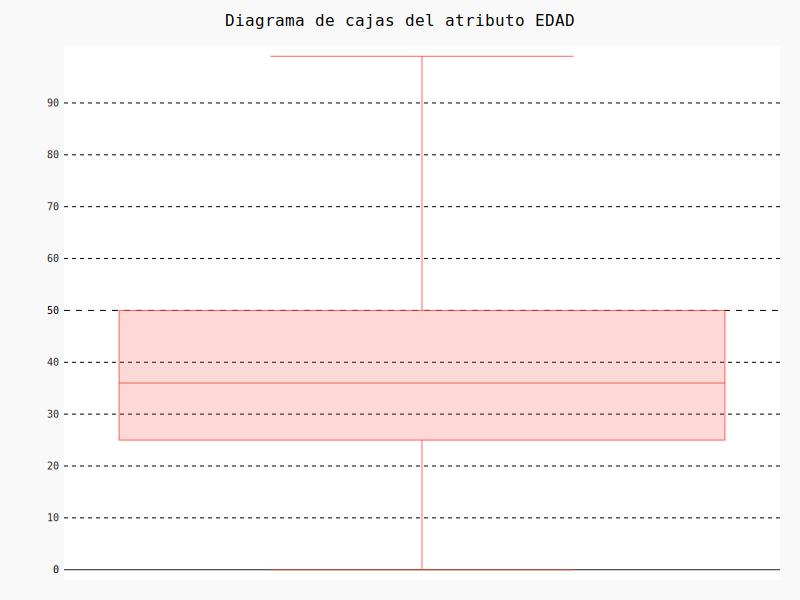

In [31]:
box_plot = pygal.Box()
box_plot.title = "Diagrama de cajas del atributo EDAD"
box_plot.add(None, edad)
box_plot.render_to_file("./figures/pygal_cajas.svg")
SVG(filename="./figures/pygal_cajas.svg")


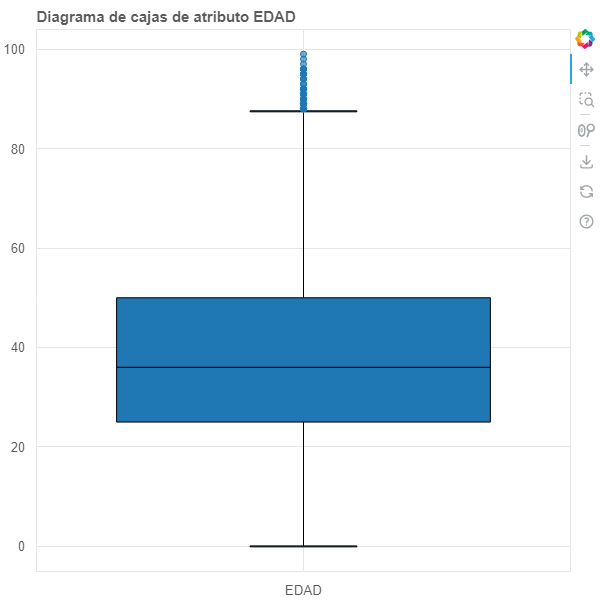

In [32]:
# Usando Bokeh
qmin, q1, q2, q3, qmax = data["EDAD"].quantile([0, 0.25, 0.5, 0.75, 1])
iqr = q3 - q1
upper = q3 + 1.5 * iqr
lower = q1 - 1.5 * iqr
mean = data["EDAD"].mean()

out = data["EDAD"][(data["EDAD"] > upper) | (data["EDAD"] < lower)]

if not out.empty:
    outlier = list(out.values)

upper = min(qmax, upper)
lower = max(qmin, lower)
hbar_height = (qmax - qmin) / 500

k = "EDAD"
p = figure(x_range= [k], title="Diagrama de cajas de atributo EDAD")
p.segment([k], upper, [k], q3, line_color="black")
p.segment([k], lower, [k], q1, line_color="black")
p.vbar([k], 0.7, q2, q3, line_color="black")
p.vbar([k], 0.7, q1, q2, line_color="black")
p.rect([k], lower, 0.2, hbar_height, line_color="black")
p.rect([k], upper, 0.2, hbar_height, line_color="black")
if not out.empty:
    p.circle([k] * len(outlier), outlier, size=6, fill_alpha=0.6)
export_png(p, filename="./figures/bokeh_cajas.png")
Image(filename="./figures/bokeh_cajas.png")
